# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [25]:
#importing panda and numpy 
import pandas as pd 
import numpy as np
#reading the csv from URL 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#First converting all column names in lower case
col_low = []
for col in data.columns:
    col_low.append(col.lower())
#Replacing ' ' for '_':
converter = lambda x: x.replace(' ', '_')
col_low = list(map(converter, col_low))
#replacing 'st' for 'state'
col_low[col_low.index('st')] = 'state'
display(col_low)
#replacing the names in the original dataframe
data.columns = col_low
data

['customer',
 'state',
 'gender',
 'education',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'policy_type',
 'vehicle_class',
 'total_claim_amount']

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [27]:
# Sorting out 'gender':
data['gender'].unique()
data['gender'] = data['gender'].replace({'Femal':'F', 'female':'F', 'Male':'M'})
data['gender'].unique()
#Looking and fixing 'state':
data['state'].unique()
data['state'] = data['state'].replace({'Cali':'California', 'AZ':'Arizona', 'WA':'Washington'})
data['state'].unique()
#Now for 'education':
data['education'] = data['education'].replace({'Bachelors':'Bachelor'})
data['education'].unique()
#Deleting the '%' in the 'customer_lifetime_value':
data['customer_lifetime_value'] = data['customer_lifetime_value'].str.replace("%", "")
data
#Replacing "Sports Car", "Luxury SUV" and "Luxury Car" by "Luxury" in 'vehicle_class':
data['vehicle_class'] = data['vehicle_class'].replace({'Sports Car':'Luxury', 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'})
data['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [28]:
# Declaring 'customer_lifetime_value' as numerical:
data['customer_lifetime_value'] =  pd.to_numeric(data['customer_lifetime_value'], errors='coerce')/100
#Fixing format in 'Number of open complaints' and declaring as numerical:
data
data['number_of_open_complaints'].unique()
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.replace("1/", "")
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.replace("/00", "")
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.replace("00", "1") #this step was required as the first code "1/" left the values with "1" = "00"
data['number_of_open_complaints'] =  pd.to_numeric(data['number_of_open_complaints'], errors='coerce')
data['number_of_open_complaints'].unique()
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [29]:
# First I want to see the number of null values, both in absolute terms and relative terms:
display(data.isna().sum())
display(round(data.isna().sum()/len(data),4)*100)
# The output suggests all columns have at least 2937 null observations, which do not add anything to the df and must be deleted altogether
#I will check first by saving in a separate dataframe 'data_c':
data_c = data[data['customer'].notna()]
display(data_c.isna().sum())
#For 'gender' I will replace Nan with mode:
data_c['gender'].value_counts() #the mode is 'F' so will impose this to nan
data_c['gender'] = data_c['gender'].fillna('F')
display(data_c.isna().sum())
#Finally, will delete the remaining 3 rows with Nan in 'customer_lifetime_value':
data_c = data_c[data_c['customer_lifetime_value'].notna()]
display(data_c.isna().sum())

customer                     2937
state                        2937
gender                       3054
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

customer                     73.28
state                        73.28
gender                       76.20
education                    73.28
customer_lifetime_value      73.35
income                       73.28
monthly_premium_auto         73.28
number_of_open_complaints    73.28
policy_type                  73.28
vehicle_class                73.28
total_claim_amount           73.28
dtype: float64

customer                       0
state                          0
gender                       117
education                      0
customer_lifetime_value        3
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_21933/1131249793.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c['gender'] = data_c['gender'].fillna('F')


customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      3
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [30]:
# Checking for duplicates:
display(data_c.duplicated().sum()) 
#It shows there are no duplicates
display(data_c.shape)
#will check if number of rows check after applying drop_duplicate:
data_c2 = data_c.drop_duplicates()
display(data_c2.shape)
#As the number of rows is the same between data_c and data_c2 I can conclude there are indeed no duplicates (this is due to the cleaning of NaN in part 4)
# Exporting this processed data to a csv
data_c.to_csv('data_clean_ver2.csv', index=False)

0

(1068, 11)

(1068, 11)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here


# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [ ]:
# Your code here

# lab-customer-analysis-round-3


In [31]:
#Show DataFrame info
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1068 non-null   object 
 1   state                      1068 non-null   object 
 2   gender                     1068 non-null   object 
 3   education                  1068 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1068 non-null   float64
 6   monthly_premium_auto       1068 non-null   float64
 7   number_of_open_complaints  1068 non-null   float64
 8   policy_type                1068 non-null   object 
 9   vehicle_class              1068 non-null   object 
 10  total_claim_amount         1068 non-null   float64
dtypes: float64(5), object(6)
memory usage: 100.1+ KB


In [32]:
#Describe DataFrame
data_c.describe(include='all')

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
count,1068,1068,1068,1068,1068.000000,1068.000000,1068.000000,1068.000000,1068,1068,1068.000000
unique,1068,5,2,5,NaN,NaN,NaN,NaN,3,4,NaN
top,QZ44356,California,F,Bachelor,NaN,NaN,NaN,NaN,Personal Auto,Four-Door Car,NaN
freq,1,331,617,331,NaN,NaN,NaN,NaN,777,573,NaN
mean,NaN,NaN,NaN,NaN,7936.902593,39315.411985,192.691948,0.395131,NaN,NaN,405.870113
std,NaN,NaN,NaN,NaN,6434.784103,30484.373979,1603.241719,0.884764,NaN,NaN,292.917158
min,NaN,NaN,NaN,NaN,2004.350700,0.000000,61.000000,0.000000,NaN,NaN,0.382107
25%,NaN,NaN,NaN,NaN,4034.079950,14072.000000,68.000000,0.000000,NaN,NaN,204.071460
50%,NaN,NaN,NaN,NaN,5881.742350,36226.000000,82.500000,0.000000,NaN,NaN,355.200000
75%,NaN,NaN,NaN,NaN,8962.871975,64668.750000,109.250000,0.000000,NaN,NaN,532.800000


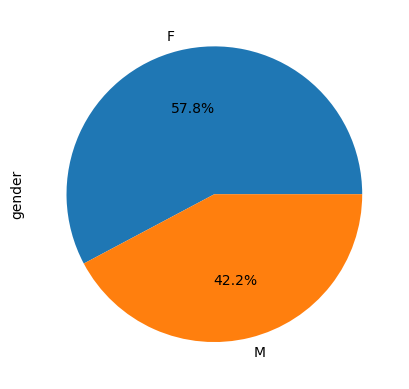

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns 

#Show a plot of the Gender breakdown.
#For this, the best is to use a pie chart
gender_counts = data_c['gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()

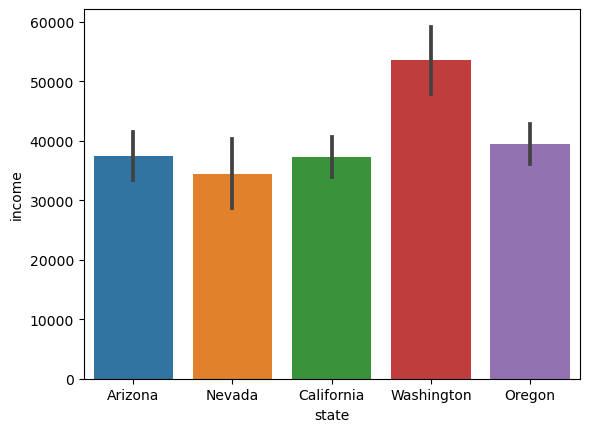

In [34]:
#Show a plot of Income by State
sns.barplot(x="state", y="income", data=data_c)
plt.show()

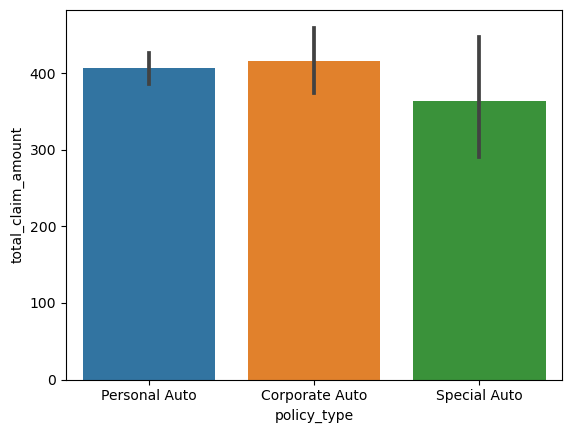

In [35]:
#Show a plot of the Policy Type by the Total Claim Amount
sns.barplot(x="policy_type", y="total_claim_amount", data=data_c)
plt.show()

[None, None, None, None, None, None, None, None, None, None]

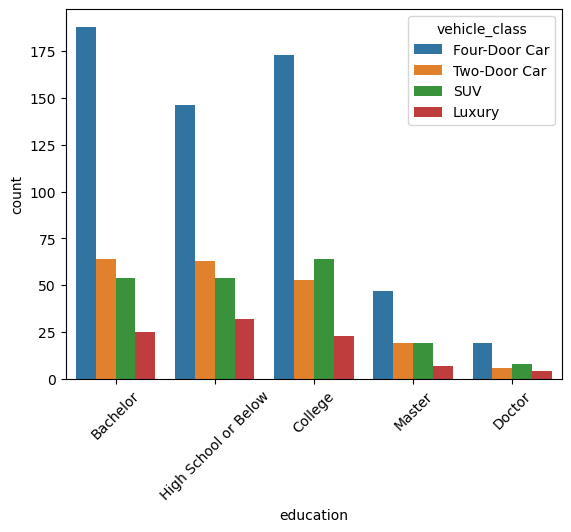

In [36]:
#Show a plot of the Education by Vehicle Class
g = sns.countplot(data=data_c, x='education', hue='vehicle_class')
plt.setp(g.get_xticklabels(), rotation=45)

##### What insights can you establish from these plots?
- From the pie chart, I can confirm that Female is the most frequent gender, accounting for nearly 60% of all observations.
- The second plot chart reveals that income tends to be on average notably higher in the state of Washington. The average income in the remaining states in the sample tends to be similar (just below 40k) with the exception of Nevada, which tends to be a bit lower (nearing 35k).
- The third plot chat reveals that the average total claim amount is somewhat bigger for corporate auto policies, but not significantly so when compared against personal auto. By contrast, this average total claim seems to be lower for policy types 'special autos'.
- Finally, the fourth plot confirms that:
    - Four-door cars are the most popular, irrespective of the education level.
    - Likewise, luxury cars are the less frequent for all type of education.
    - The most frequent education level seems to be bachelor degree, while the less frequent education in doctor.

##### What other plots do you feel would be beneficial?
There could be plenty of other charts and statistical analysis, including:
- Histograms to understand the distribution of each column.
- Boxplols could also be rather useful for seeing this information by each column.
- Bar plots as well as scatter plots could help for identifying the relationship between two given variables.
- Likewise, correlation analysis will be rather useful.


# Lab Customer Analysis Round 4

In [54]:
#Check the data types of the columns.
data_c.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [56]:
#Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical.
numerical = data_c.select_dtypes(include = np.number)
categorical = data_c.select_dtypes(include = object)
categorical
numerical
#After seing the data, I want to exclude 'number_of_open_claims' from numerical and include as categorical, as the column only takes 5 different categories
categorical['number_of_open_complaints'] = numerical['number_of_open_complaints']
numerical = numerical.drop(['number_of_open_complaints'], axis=1)
#categorica

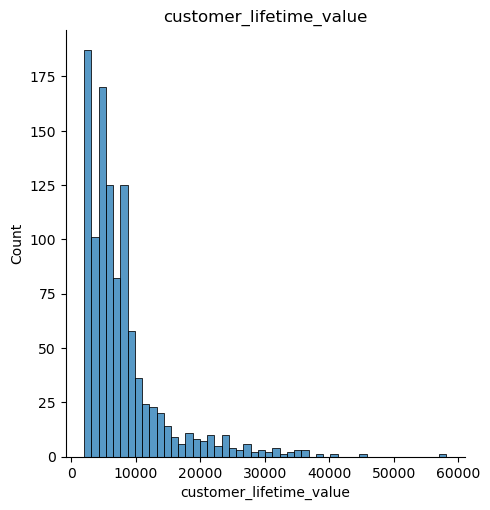

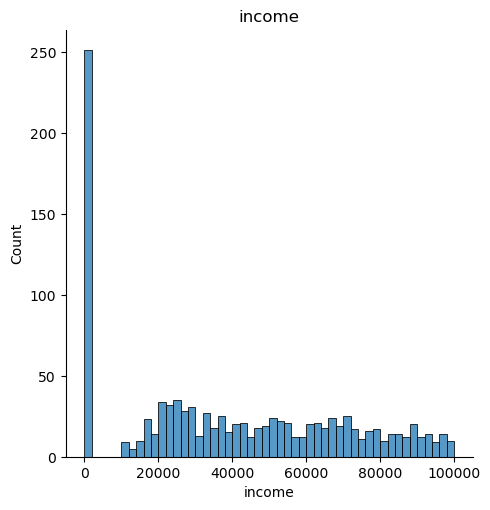

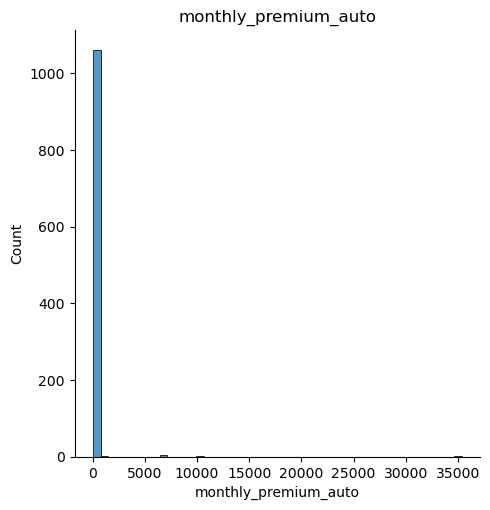

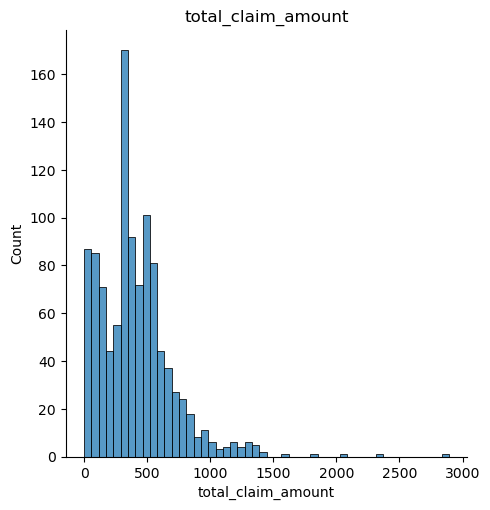

In [46]:
#Use seaborn library to construct distribution plots for the numerical variables
#customer_lifetime_value
sns.displot(numerical['customer_lifetime_value'], bins=50).set(title='customer_lifetime_value')
plt.show()
#income
sns.displot(numerical['income'], bins=50).set(title='income')
plt.show()
#monthly_premium_auto
sns.displot(numerical['monthly_premium_auto'], bins=50).set(title='monthly_premium_auto')
plt.show()
#total_claim_amount
sns.displot(numerical['total_claim_amount'], bins=50).set(title='total_claim_amount')
plt.show()

In [ ]:
#Do the distributions for different numerical variables look like a normal distribution
#In general, the numerical variables do not seem to be distributed like a bell-shaped normal, with the exception of the target column 'total_claims_amount'

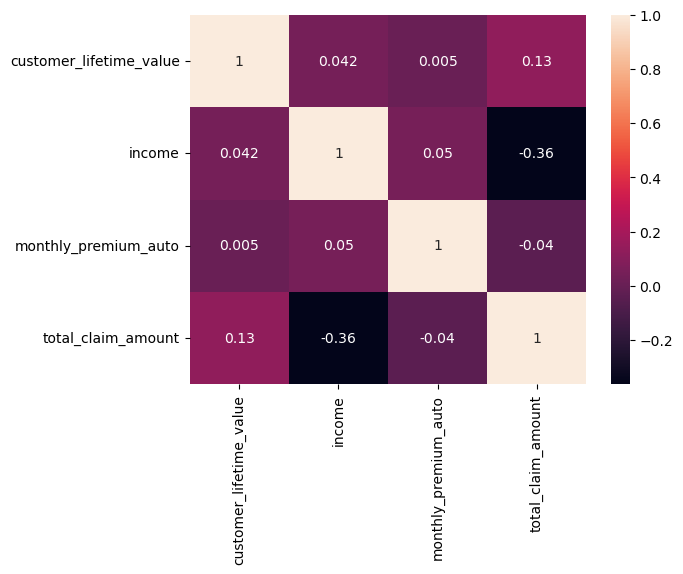

In [57]:
#For the numerical variables, check the multicollinearity between the features.
#Please note that we will use the column total_claim_amount later as the target variable
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [58]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.041648,0.005027,0.131686
income,0.041648,1.000000,0.049803,-0.363539
monthly_premium_auto,0.005027,0.049803,1.000000,-0.040038
total_claim_amount,0.131686,-0.363539,-0.040038,1.000000


In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#From the heatmap and the correlation matrix, it seems there is no multicollinearity between the features.
#There is no need to drop any of the numerical variables.

# Lab | Customer Analysis Round 5

In [59]:
#X-y split.
y = data_c['total_claim_amount']
X = data_c.drop(['total_claim_amount'], axis=1) #I include also categorical variables but will probably need to transform them in a later stage
y
X

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0.0,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0.0,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0.0,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0.0,Personal Auto,Four-Door Car
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,0.0,Personal Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.5503,38644.0,78.0,1.0,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2.0,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0.0,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,4626.8011,79487.0,114.0,0.0,Special Auto,SUV


In [60]:
#Scaling: will focuse only in the numerical variables I declared in the previous step
#Will use standard scaler (I find it more intuitive)
from sklearn.preprocessing import StandardScaler

# scaling standard scaler: make data distributed with mean=0 and std=1
x_numerical = numerical.drop(['total_claim_amount'], axis=1)
transformer = StandardScaler().fit(x_numerical)
x_standardized = transformer.transform(x_numerical)
print(x_standardized.shape)
x_numerical_s = pd.DataFrame(x_standardized, columns=x_numerical.columns)
x_numerical_s

(1068, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,-0.148850,-1.290295,-0.061587
1,0.769699,0.310192,-0.052850
2,-0.045250,-1.290295,-0.054098
3,-0.400174,-0.097092,-0.077811
4,0.049659,0.774090,-0.077187
...,...,...,...
1063,-0.758322,-0.022035,-0.071571
1064,1.924524,0.784165,-0.056594
1065,-0.730402,-0.763188,-0.065331
1066,-0.514649,1.318394,-0.049106


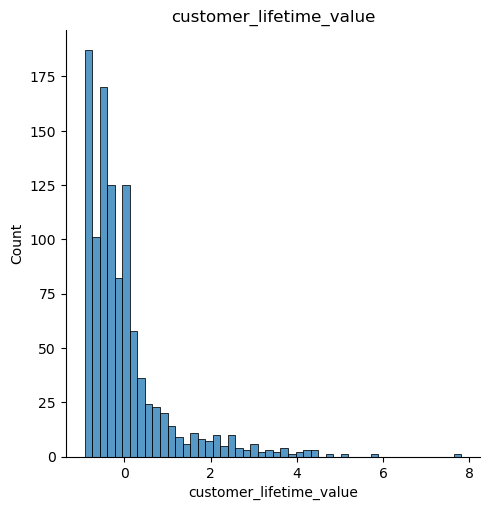

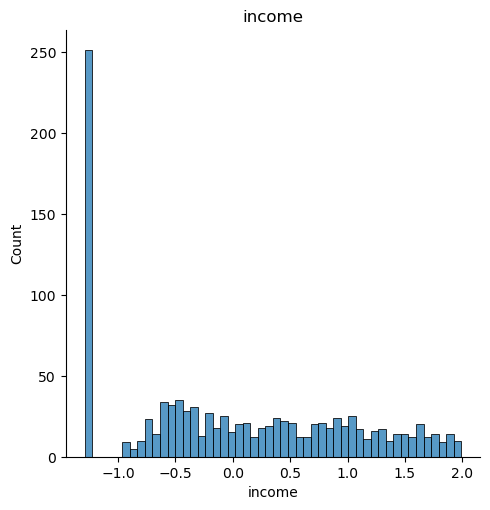

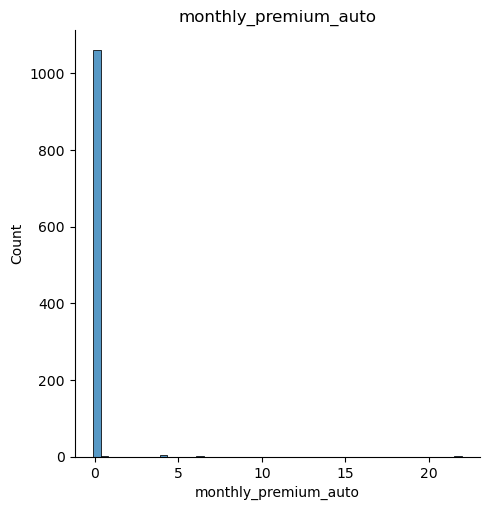

In [61]:
#Seeing the distribution
#customer_lifetime_value
sns.displot(x_numerical_s['customer_lifetime_value'], bins=50).set(title='customer_lifetime_value')
plt.show()
#income
sns.displot(x_numerical_s['income'], bins=50).set(title='income')
plt.show()
#monthly_premium_auto
sns.displot(x_numerical_s['monthly_premium_auto'], bins=50).set(title='monthly_premium_auto')
plt.show()